In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import os

In [3]:
## Defining constants

DATASET = "./dataset"

TRAIN_DIR = DATASET + "/train"
TEST_DIR = DATASET + "/test"

TRAIN_IMAGES = os.listdir(TRAIN_DIR + '/images')
TRAIN_IMAGES.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
TRAIN_ANNOTATIONS = os.listdir(TRAIN_DIR + '/labels')
TRAIN_ANNOTATIONS.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

TEST_IMAGES = os.listdir(TEST_DIR + '/images')
TEST_ANNOTATIONS = os.listdir(TEST_DIR + '/labels')



In [4]:
assert len(TRAIN_IMAGES) == len(TRAIN_ANNOTATIONS), "Train images and annotations are not of same length"
assert len(TEST_IMAGES) == len(TEST_ANNOTATIONS), "Test images and annotations are not of same length"

./dataset/train/images/IMG_169.jpg ./dataset/train/labels/IMG_169.txt
     0    1    2    3
0   10   30  210  230
1   10  453  210  653
2   10  661  210  861
3  390   30  590  230
4  390  234  590  434
5  390  647  590  847
./dataset/train/images/IMG_207.jpg ./dataset/train/labels/IMG_207.txt
     0    1    2    3
0   10  574  210  774
1  390  529  590  729
2  390  743  590  943
./dataset/train/images/IMG_63.jpg ./dataset/train/labels/IMG_63.txt
     0    1    2    3
0   10  317  210  517
1   10  541  210  741
2  390  468  590  668
./dataset/train/images/IMG_132.jpg ./dataset/train/labels/IMG_132.txt
     0    1    2    3
0   10   30  210  230
1   10  535  210  735
2   10  754  210  954
3  390  523  590  723
./dataset/train/images/IMG_236.jpg ./dataset/train/labels/IMG_236.txt
     0    1    2    3
0   10   30  210  230
1   10  708  210  908
2  390   30  590  230
3  390  262  590  462
./dataset/train/images/IMG_2.jpg ./dataset/train/labels/IMG_2.txt
     0    1    2    3
0   10   30  2

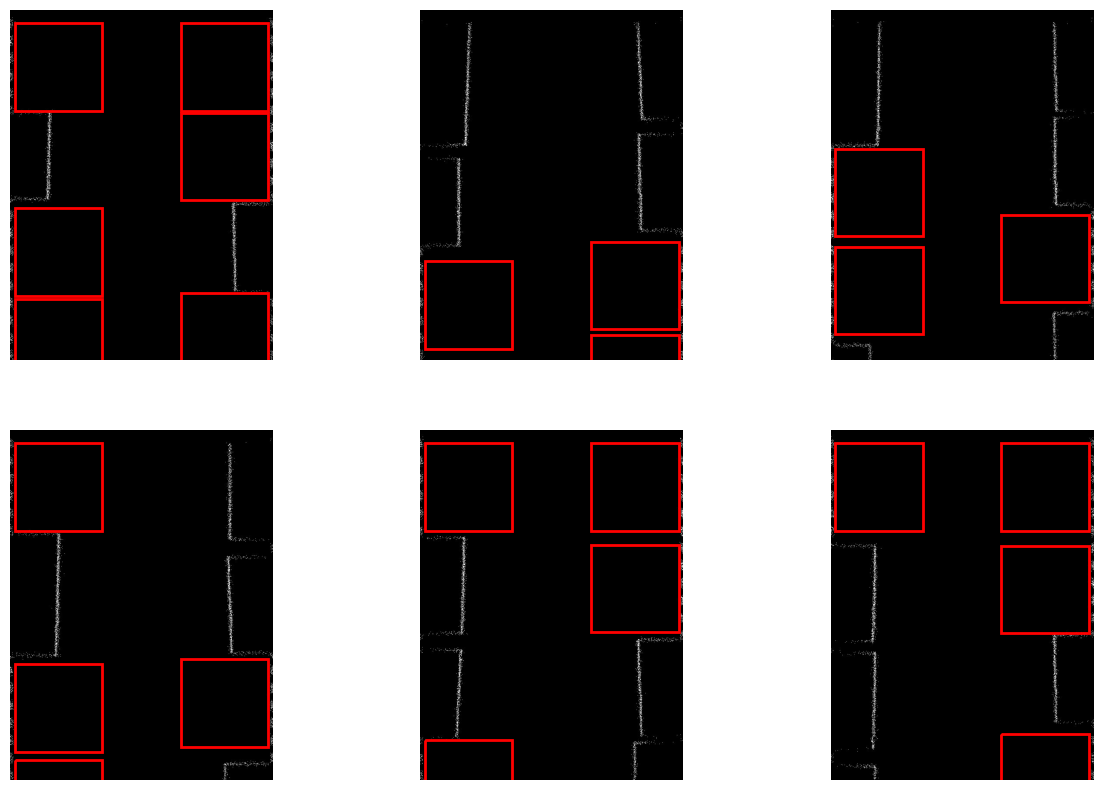

In [5]:
# Constants
ROWS = 2
COLS = 3

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(ROWS, COLS, figsize=(15, 10))

# Loop through images and display with bounding boxes
for i in range(ROWS * COLS):
    # Select a random index for an image and its annotation
    index = np.random.randint(0, len(TRAIN_IMAGES))
    
    # Load image
    img = plt.imread(TRAIN_DIR + '/images/' + TRAIN_IMAGES[index], )
    
    # Load corresponding annotation (bounding box coordinates)
    bbox_df = pd.read_csv(TRAIN_DIR + '/labels/' + TRAIN_ANNOTATIONS[index], delimiter=" ", header=None)
    
    # Plot the image on the correct axis (use 2D array indexing)
    ax = axes[i // COLS, i % COLS]
    ax.imshow(img)
    
    # Get the image dimensions
    height, width, _ = img.shape
    # Draw bounding boxes
    for row in bbox_df.itertuples(index=False):
        # Extract bounding box coordinates
        x_min, y_min, x_max, y_max = row
        
        # Create a rectangle patch for the bounding box
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')
        
        # Add the bounding box to the current subplot
        ax.add_patch(rect)
    
    # Turn off axis for each image
    ax.axis('off')

# Display the images with bounding boxes
plt.show()